<a href="https://colab.research.google.com/github/Ebadi-Fereshteh/Deep-Learning/blob/main/Compare%20MLP%20vs%20CNN/cifar100/cifar100_mlp_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

In [3]:
wandb.init(project= "MLP cifar100")

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [21]:
config = wandb.config
config.learning_rate = 0.001


In [22]:
(X_train, Y_train),(X_test, Y_test) = tf.keras.datasets.cifar100.load_data()


In [23]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0 , X_test / 255.0

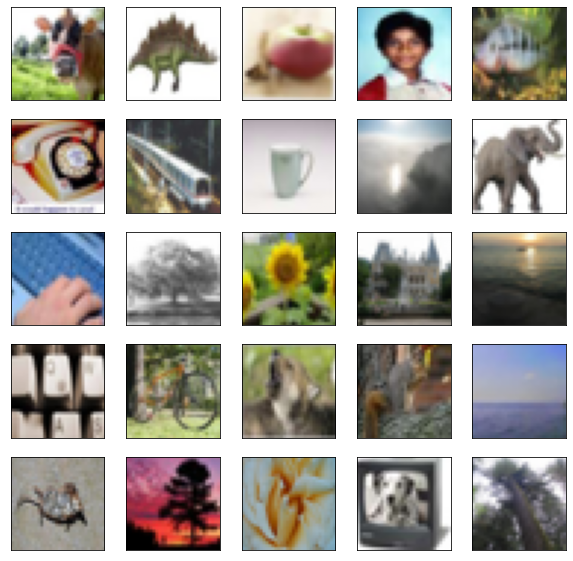

In [24]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              #  'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    # plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [25]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train,test_size=0.1 ,random_state = 40)

### MLP Model

In [26]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
      #  Dense(512, activation="relu"),
      #  Dense(256, activation="relu"),
      #  Dense(128, activation="relu"),
      #  Dense(128, activation="relu"),
       Dense(128, activation="relu"),
       Dense(256, activation="relu"),
       Dense(128, activation="relu"),
       Dense(100, activation="softmax")                                     
])

In [27]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss= tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

## Train

In [28]:
model_history = model.fit(X_train, Y_train, epochs= 20, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/20
1407/1407 [==============================] - 7s 5ms/step - loss: 4.1446 - accuracy: 0.0620 - val_loss: 3.9532 - val_accuracy: 0.0878 - _timestamp: 1648646895.0000 - _runtime: 311.0000
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.8975 - accuracy: 0.0923 - val_loss: 3.8366 - val_accuracy: 0.1044 - _timestamp: 1648646902.0000 - _runtime: 318.0000
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.8038 - accuracy: 0.1101 - val_loss: 3.8357 - val_accuracy: 0.1078 - _timestamp: 1648646908.0000 - _runtime: 324.0000
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.7331 - accuracy: 0.1208 - val_loss: 3.8282 - val_accuracy: 0.1040 - _timestamp: 1648646914.0000 - _runtime: 330.0000
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 3.6882 - accuracy: 0.1252 - val_loss: 3.7506 - val_accuracy: 0.1236 - _timestamp: 1648646920.0000 - _runtime: 336.0000
Epoch 6/20
1407/1407 [===

## Test

In [29]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.5733 - accuracy: 0.1580


[3.573340654373169, 0.15800000727176666]

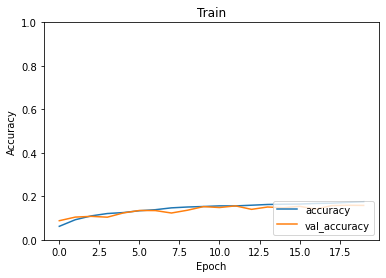

In [30]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [31]:
model.save('mlp-cifar100.h5')

## CNN Model

In [32]:
model = tf.keras.models.Sequential([
      layers.Conv2D(32, (3, 3), input_shape=(32,32, 3), activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D(),
      # layers.Conv2D(128, (3, 3), activation='relu'),
      # layers.MaxPooling2D(),
      layers.Conv2D(64, (3, 3), activation='relu'),
      # layers.AveragePooling2D(),
      # layers.Conv2D(16, (3, 3), activation='relu'),
      layers.Flatten(),   
      # Dense(128, activation="relu"),
      # Dense(128, activation="relu"),
      Dense(128, activation="relu"),
      # Dense(64, activation="relu"),
      # Dense(32, activation="relu"),
      Dense(100, activation="softmax") 
])


In [33]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= config.learning_rate),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
              )


In [34]:
model_history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_validation, Y_validation), callbacks=[WandbCallback()])

Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 4.0141 - accuracy: 0.0859 - val_loss: 3.5581 - val_accuracy: 0.1616 - _timestamp: 1648647045.0000 - _runtime: 461.0000
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 3.3300 - accuracy: 0.1988 - val_loss: 3.1898 - val_accuracy: 0.2278 - _timestamp: 1648647057.0000 - _runtime: 473.0000
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 3.0116 - accuracy: 0.2567 - val_loss: 3.0138 - val_accuracy: 0.2588 - _timestamp: 1648647068.0000 - _runtime: 484.0000
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 2.8028 - accuracy: 0.2991 - val_loss: 2.8997 - val_accuracy: 0.2902 - _timestamp: 1648647079.0000 - _runtime: 495.0000
Epoch 5/10
1407/1407 [==============================] - 11s 8ms/step - loss: 2.6482 - accuracy: 0.3289 - val_loss: 2.8245 - val_accuracy: 0.3140 - _timestamp: 1648647091.0000 - _runtime: 507.0000
Epoch 6/10
1407/1407

In [35]:
test_loss, test_acc= model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.6402 - accuracy: 0.3504


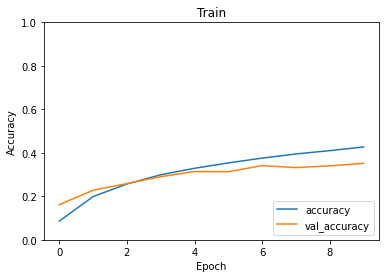

In [36]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train')
plt.ylim([0, 1])
plt.legend(loc='lower right')



In [37]:
model.save('cnn-mlp-cifar100.h5')